# Graduate Admissions Dataset



## Context
__This dataset is created for prediction of Graduate Admissions from an Indian perspective.__

### Content

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose 
5. Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )


__Let load the necessary library in the Notebook__

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [291]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [292]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


**Now, let us drop the irrelevant(Serial No.) column and check if there are any null values in the dataset**

In [293]:
df = df.drop(['Serial No.'], axis=1)
df.head(n=10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [294]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

__Lets look at some random rows__

In [295]:
df.sample(frac=.01)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
156,315,105,3,2.0,2.5,8.34,0,0.70
493,300,95,2,3.0,1.5,8.22,1,0.62
176,329,119,4,4.5,4.5,9.16,1,0.90
203,334,120,5,4.0,5.0,9.87,1,0.97
67,316,107,2,3.5,3.5,8.64,1,0.57


In [296]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [298]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

We will list all the columns for all data. We check all columns. Is there any spelling mistake?<br>
We will now set the headings of the feature values in the data set.

In [299]:
df.columns= df.columns.str.strip().str.replace(" ","_")

In [300]:
df.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

In [301]:
df.shape

(500, 8)

In [302]:
df.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Lets Do Investigating The Data And Exploratory Data Analysis

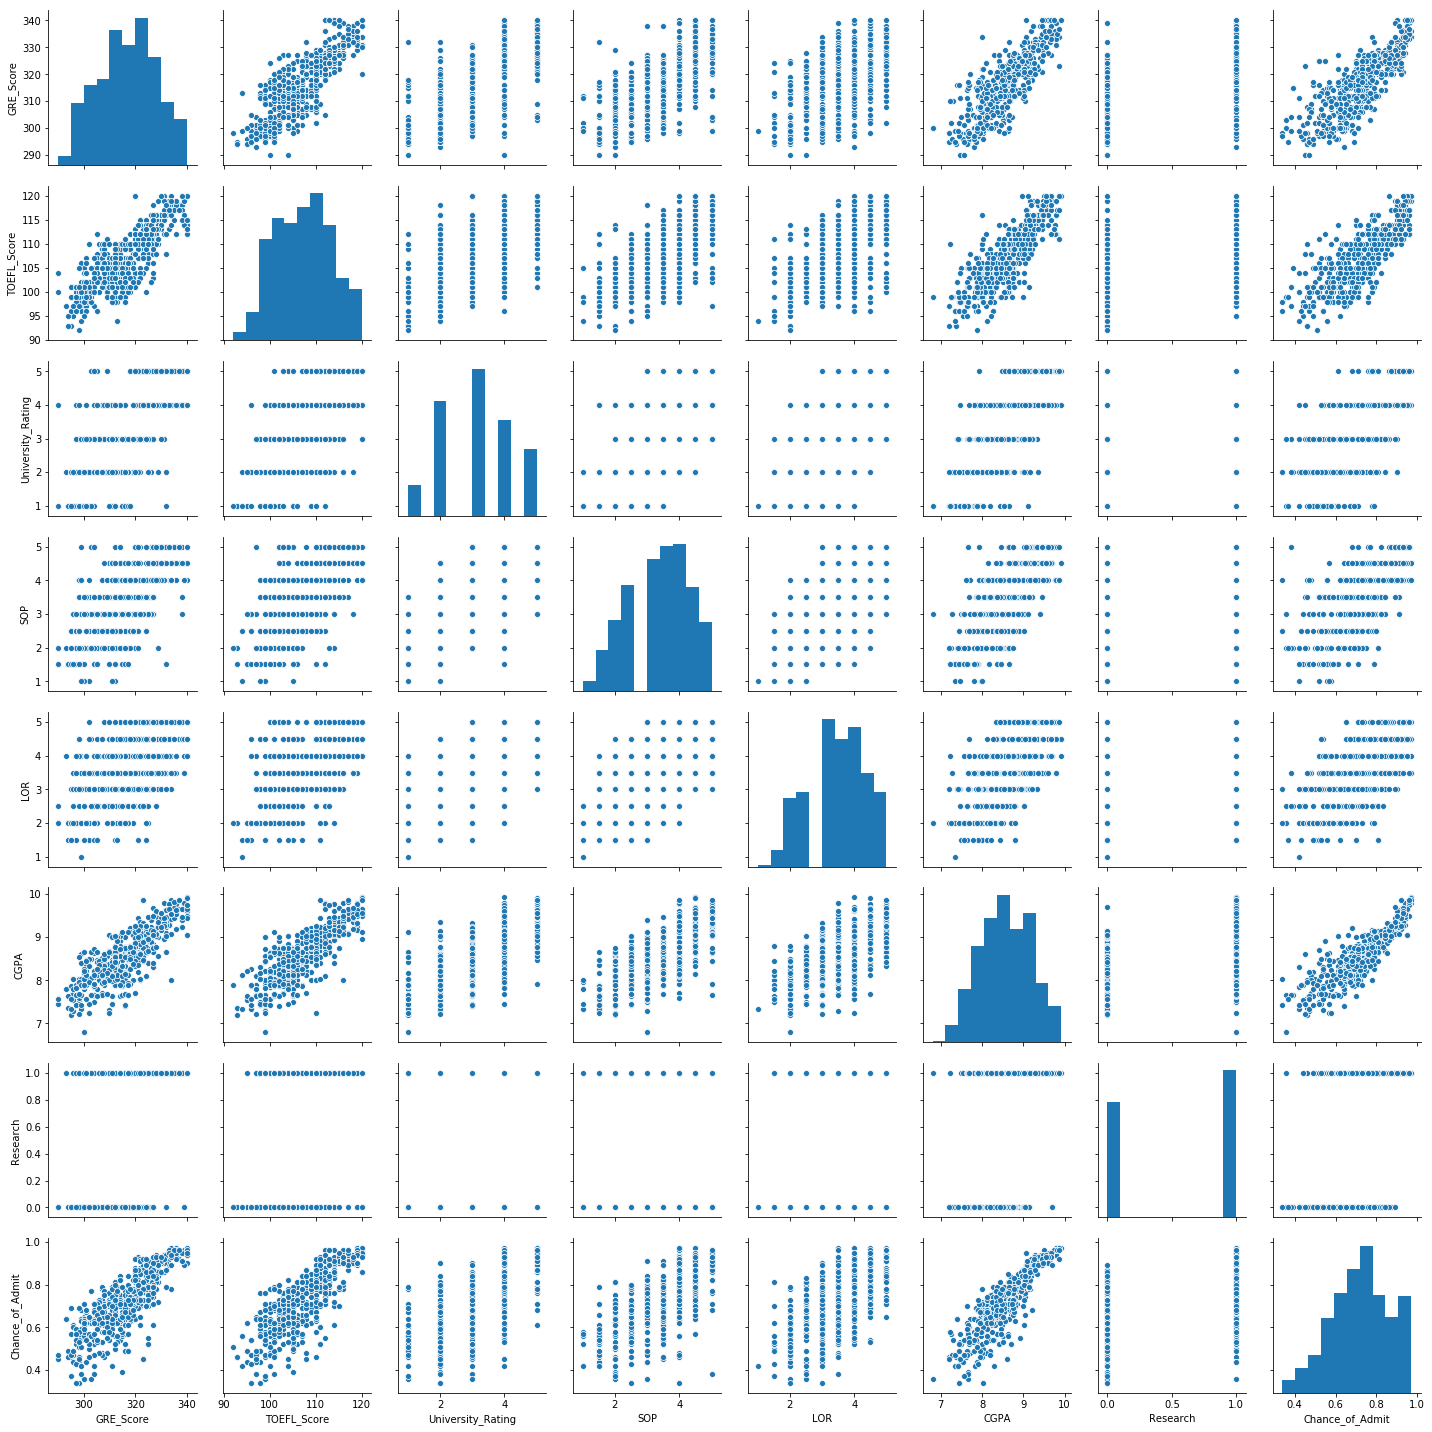

In [142]:
sns.pairplot(df)

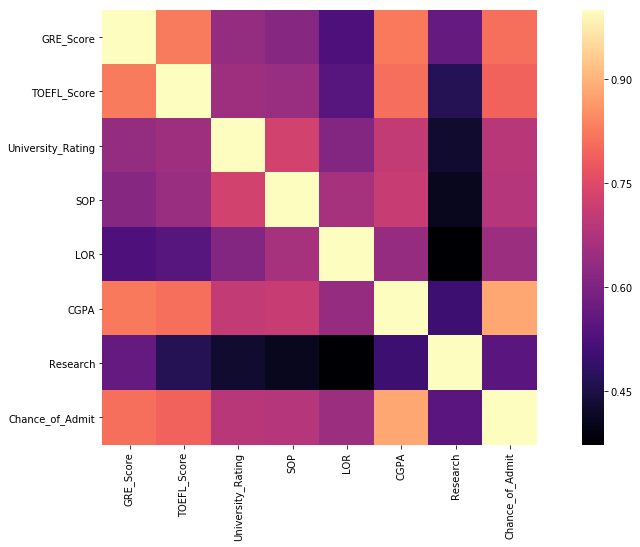

In [143]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap ='magma', square=True)

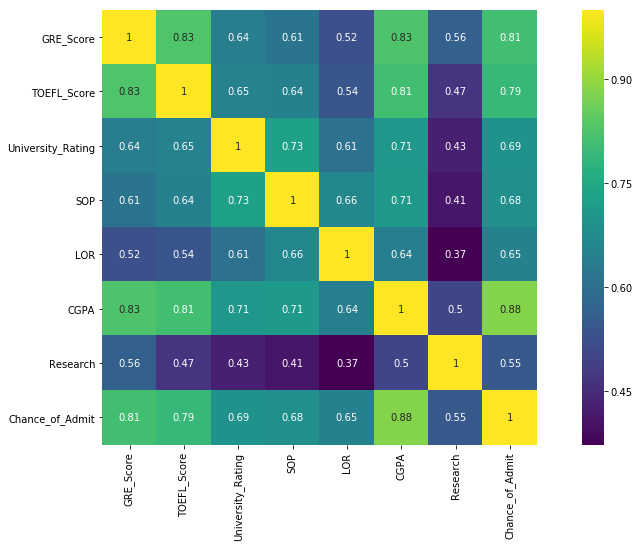

In [144]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap ='viridis',annot=True, square=True)

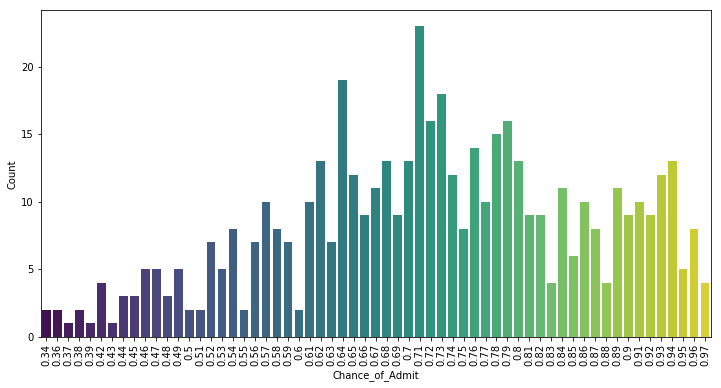

In [159]:
# the number of data is performed.
plt.figure(figsize=(12,6))
research_predict=df.groupby('Chance_of_Admit')['TOEFL_Score'].count()
sns.barplot(x=research_predict.index,y=research_predict.values,palette='viridis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Lets see the distribution of the variables of graduate applicants.**

Text(0.5, 1.0, 'Distribution of GRE Scores')

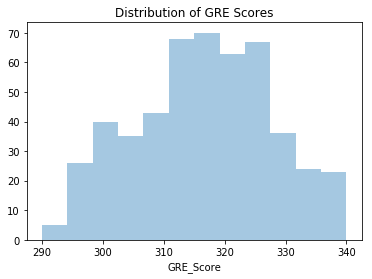

In [149]:
fig = sns.distplot(df['GRE_Score'], kde=False)
plt.title("Distribution of GRE Scores")



In [ ]:
fig = sns.distplot(df['TOEFL_Score'], kde=False)
plt.title("Distribution of TOEFL Scores")




Text(0.5, 1.0, 'Distribution of University Rating')

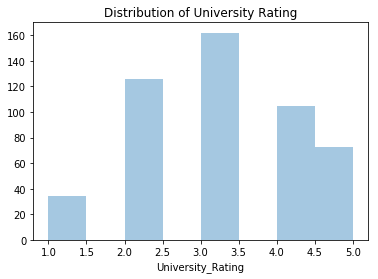

In [150]:
fig = sns.distplot(df['University_Rating'], kde=False)
plt.title("Distribution of University Rating")




Text(0.5, 1.0, 'Distribution of SOP Ratings')

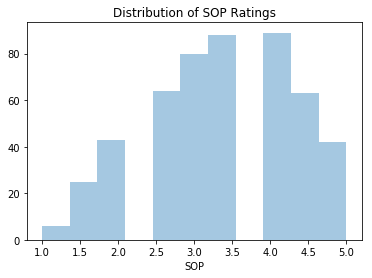

In [151]:
fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")

Text(0.5, 1.0, 'Distribution of CGPA')

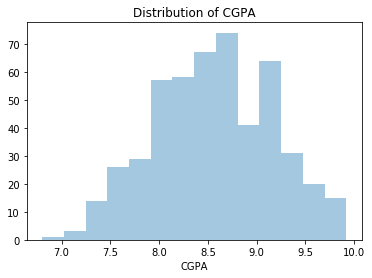

In [163]:
fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")

It is clear from the distributions, students with varied merit apply for the university.

Understanding the relation between different factors responsible for graduate admissions

Text(0.5, 1.0, 'GRE Score vs TOEFL Score')

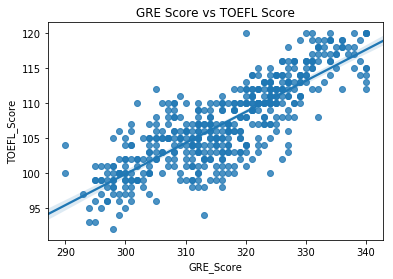

In [175]:
fig = sns.regplot(data=df, x="GRE_Score", y="TOEFL_Score",)
plt.title("GRE Score vs TOEFL Score")

Although there are exceptions, people with higher TOEFL Score usually have higher GRE scores maybe because they try to crack both exam at the same time preparing for both the exam.

Text(0.5, 1.0, 'GRE Score vs CGPA')

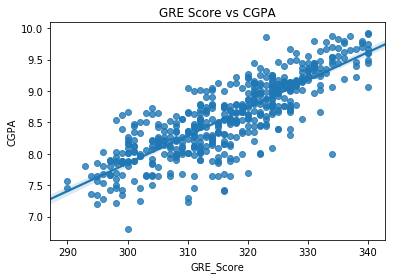

In [179]:
fig = sns.regplot(data=df, x="GRE_Score", y="CGPA")
plt.title("GRE Score vs CGPA")

Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they try to crack both exam at the same time preparing for both the exam.

Text(0.5, 1.0, 'CGPA Score vs CGPA')

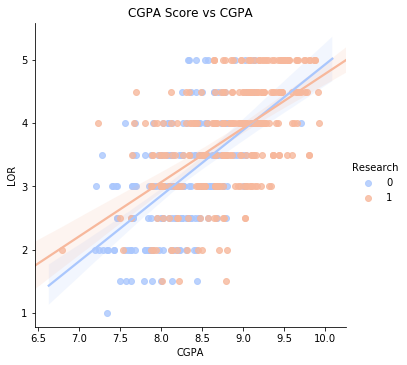

In [193]:
fig = sns.lmplot(data=df, x="CGPA", y="LOR" , hue="Research",palette='coolwarm')
plt.title("CGPA Score vs CGPA")

Text(0.5, 1.0, 'CGPA Score vs CGPA')

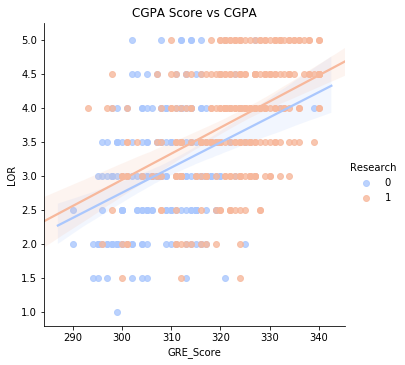

In [194]:
fig = sns.lmplot(data=df, x="GRE_Score", y="LOR" , hue="Research",palette='coolwarm')
plt.title("CGPA Score vs CGPA")

Text(0.5, 1.0, 'GRE Score vs LOR')

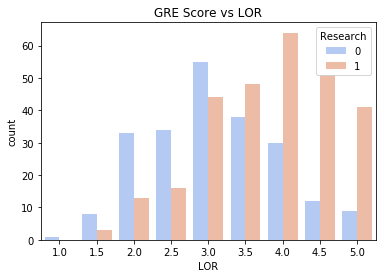

In [190]:
fig = sns.countplot(hue="Research", x="LOR", data=df,palette="coolwarm")
plt.title("GRE Score vs LOR")

> **LORs are not that related with CGPA and GRE_Score so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs.**

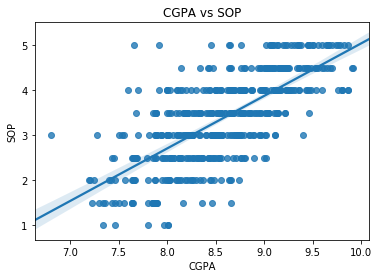

In [198]:
fig = sns.regplot( data=df, x="CGPA", y="SOP")
plt.title("CGPA vs SOP")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is not related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs

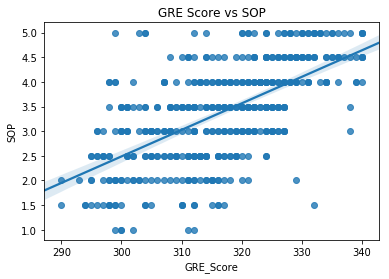

In [200]:
fig = sns.regplot( data=df, x="GRE_Score", y="SOP")
plt.title("GRE Score vs SOP")
plt.show()


Similary, GRE Score and SOP is only slightly related



Text(0.5, 1.0, 'TOEFL Score vs CGPA')

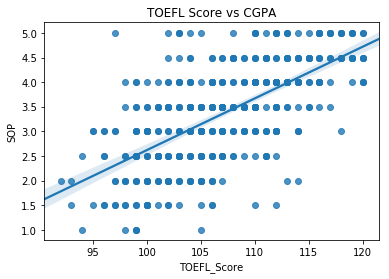

In [201]:
fig = sns.regplot(data=df, x="TOEFL_Score", y="SOP")
plt.title("TOEFL Score vs CGPA")


Applicants with different kinds of SOP have different kinds of TOEFL Score. So the quality of SOP is not always related to the applicants English skills.



# Train Test Split
* let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

**Now seperate the dataset as response variable and feature variabes**

In [328]:
X = df.drop(['Chance_of_Admit'], axis=1)
y = df['Chance_of_Admit']

In [329]:
print(X.shape, y.shape)


(500, 7) (500,)


In [330]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False,)

In [336]:
print(X_train.shape,  X_test.shape,  y_train.shape,  y_test.shape) 

(400, 7) (100, 7) (400,) (100,)


**Lets use a bunch of different continues Regression algorithms to see which model performs better**

In [226]:
from sklearn.linear_model import Lasso, Ridge, BayesianRidge, ElasticNet, LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score, root

In [252]:
models = [['Linear Regression :', LinearRegression()],
           ['Lasso: ', LassoCV(cv=5, random_state=0)],
           ['Ridge: ', RidgeCV(alphas=[0.01, 0.1, 0.001, 1])],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()]]

In [338]:
print("Results...", '\n\n')
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
   
    print(name)
    print('MSE', mean_squared_error(y_test, predictions))
    print('MAE', mean_absolute_error(y_test, predictions))
    print("RMSE", np.sqrt(mean_squared_error(y_test, predictions)))
    print("Linear Score", linear.score(x_test_trans,y_test))
    print("R Squred", r2_score(y_test, predictions))
    print('explained_variance_score', explained_variance_score(y_test, predictions), "\n")

Results... 


Linear Regression :
MSE 0.001843174437604737
MAE 0.03390995704418329
RMSE 0.04293220746251859
Linear Score -1.0347555661000576
R Squred 0.898286909853386
explained_variance_score 0.8982886592516175 

Lasso: 
MSE 0.0018072912678684045
MAE 0.033573323788588995
RMSE 0.04251224844522346
Linear Score -1.0347555661000576
R Squred 0.9002670740764103
explained_variance_score 0.9003245258973722 

Ridge: 
MSE 0.0018398953374717144
MAE 0.033942269173264365
RMSE 0.04289400118281943
Linear Score -1.0347555661000576
R Squred 0.8984678625622697
explained_variance_score 0.8984678872252077 

BayesianRidge: 
MSE 0.001840099098242741
MAE 0.03403849054875497
RMSE 0.042896376283349864
Linear Score -1.0347555661000576
R Squred 0.8984566182995191
explained_variance_score 0.8984590719459119 

ElasticNet: 
MSE 0.007637234796017603
MAE 0.06950668776908774
RMSE 0.08739127414117272
Linear Score -1.0347555661000576
R Squred 0.57854952009443
explained_variance_score 0.578964421364805 



### Something as simple as Linear Regression performs the best in this case, which proves that complicated models doesnt always mean better results. There are situations when simple models are much better suited